In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_type_folders = os.listdir('/content/drive/MyDrive/DataSet')
print("Folders inside Dataset Folder = ",image_type_folders)

Folders inside Dataset Folder =  ['positive', 'negative']


In [ ]:
retinopathy_images = []

for folders in image_type_folders:
  # entering each folder one by one
  folder_name = os.listdir('/content/drive/MyDrive/DataSet' + '/' + folders)

  # adding images to the list from a specific folder
  for images in folder_name:
    retinopathy_images.append((folders, str('/content/drive/MyDrive/DataSet' + '/' + folders) + '/' + images))
    print(retinopathy_images[:1])


[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_

In [ ]:
images_df = pd.DataFrame(data=retinopathy_images, columns=['Type', 'Image'])
images_df.head()

,Type,Image
0,positive,/content/drive/MyDrive/DataSet/positive/Modera...
1,positive,/content/drive/MyDrive/DataSet/positive/Modera...
2,positive,/content/drive/MyDrive/DataSet/positive/Modera...
3,positive,/content/drive/MyDrive/DataSet/positive/Modera...
4,positive,/content/drive/MyDrive/DataSet/positive/Modera...


In [ ]:
# let's check how many samples are there
print("Total number of images in the dataset: ", len(images_df))

Total number of images in the dataset:  2752


In [ ]:
images_count = images_df['Type'].value_counts()

images_count

,count
Type,
positive,1750
negative,1002


In [ ]:
import cv2
path = '/content/drive/MyDrive/DataSet'

image_size = 224
images = [] # here we will store the images only
labels = [] # i.e. which image belongs to which folder

for folder_names in image_type_folders:
  data_path = path + '/' + folder_names
  filenames = [folder_names for folder_names in os.listdir(data_path)]

  for f in filenames:
    img = cv2.imread(data_path + '/' + f) # reading images in the form of an array of pixel values
    img = cv2.resize(img, (image_size, image_size)) # here we are resizing all the images into same size
    images.append(img)
    labels.append(folder_names)

In [ ]:
# Converting image array into numpy array
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(2752, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels)

labels = labels.reshape(-1, 1)

Y = to_categorical(labels)
Y.shape
# Since we have only 2 labels "Positive" & "Negative" folder therefore there is only 2 binary output (i.e. 1 & 0)

[1 1 1 ... 0 0 0]


(2752, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, Y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2201, 224, 224, 3)
(551, 224, 224, 3)
(2201, 2)
(551, 2)


In [ ]:
from tensorflow.keras import layers, models

In [ ]:
cnn = models.Sequential([

    #CNN layers (let's test only 3 layers)
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    # Here filters = 32 means 32 such features which is extracted from the image of size 3x3 & then convert all (-ve) values to 0
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(), # Convert 2D to 1D image
    layers.Dense(64, activation='relu'), # Fully connnected Layer
    layers.Dense(2, activation='softmax') # Last layer is for classification layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,631,234 (21.48 MB)

 Trainable params: 5,631,234 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#computing the model parameters
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Basically here we observed that if we fit the model on the iterations > 35 the overall model aacuracy rate degrades. Therefore we have run epochs for 35 only.


In [ ]:
history = cnn.fit(x_train, y_train, epochs=35, batch_size=16)

Epoch 1/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7995 - loss: 0.4373
Epoch 2/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9188 - loss: 0.2248
Epoch 3/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9177 - loss: 0.2057
Epoch 4/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9448 - loss: 0.1526
Epoch 5/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9467 - loss: 0.1525
Epoch 6/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9611 - loss: 0.1105
Epoch 7/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9588 - loss: 0.1179
Epoch 8/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9655 - loss: 0.0923
Epoch 9/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9796 - loss: 0.0611
Epoch 10/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9780 - loss: 0.0718
Epoch 11/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9888 - loss: 0.0449
Epoch 12/35
138/138 ━━━━━━━━━━━━━━━━━━━

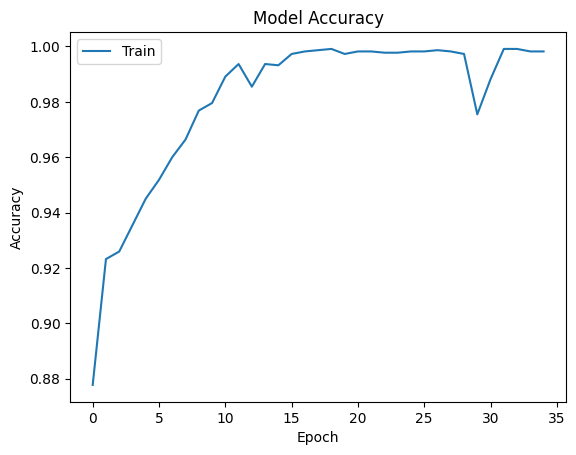

In [ ]:
import matplotlib.pyplot as plt

def plot_aacuracyGraph(history):
  plt.plot(history.history['accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

plot_aacuracyGraph(history)

In [ ]:
y_predict = cnn.predict(x_test)
y_predict

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


array([[5.7253742e-14, 1.0000000e+00],
       [2.5949427e-36, 1.0000000e+00],
       [9.9918848e-01, 8.1148848e-04],
       ...,
       [4.2038954e-45, 1.0000000e+00],
       [9.9998450e-01, 1.5508567e-05],
       [8.9055078e-27, 1.0000000e+00]], dtype=float32)

In [ ]:
# import pickle # importing pickle module for saving the trained model

# # Here we have saved the cnn model named as "cnn_model.pkl" and later we use this model in our web app to predict images
# with open('cnn_model.pkl','wb') as file:
#   pickle.dump(cnn,file)

In [ ]:
loss, accuracy = cnn.evaluate(x_test, y_test) # Maybe .evaluate() function is taking the average of some epochs and give the overall accuracy of the model
accuracy = accuracy * 100
print(f"Overall Model Accuracy rate = {accuracy:.3f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8875 - loss: 0.8153
Overall Model Accuracy rate = 90.200%


#Testing Random Image to see how the model is performing on a unseen Data

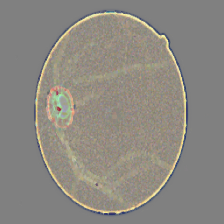

In [ ]:
from keras.preprocessing.image import load_img

test_image = load_img('/content/drive/MyDrive/DataSet/negative/Healthy_107.png', target_size = (224,224))
test_image

In [ ]:
test_image = np.array(test_image)
test_image.shape

(224, 224, 3)

In [ ]:
# reshape the image for model
test_image = test_image.reshape(1,224,224,3)
test_image.shape

(1, 224, 224, 3)

In [ ]:
classify = cnn.predict(test_image)
print("Final result = ",classify)

# Here we can see that the image belongs to the negative class.
# Here the image is classified with having an probability of 100% as per the CNN model that the image belongs to 1st class

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
Final result =  [[1. 0.]]
